In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn import metrics
from matplotlib import style
%matplotlib inline

In [2]:
dataset=pd.read_csv('../Datasets/house_data.csv')

In [3]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
dataset.shape

(13320, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
dataset.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
##Converting the categorical values in area type to numerical
dataset['area_type'] = dataset['area_type'].replace(['Super built-up  Area', 'Plot  Area', 'Built-up  Area','Carpet  Area'],[0,1,2,3])

In [8]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,0,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,0,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Converting the categorical values in column availability into 3 columns

1.Ready To Move
2.Immediate Possession
3.Others

In [9]:
def replace_availability(my_string):
    if my_string == 'Ready To Move':
        return 0
    elif my_string == 'Immediate Possession':
        return 1
    else:
        return 2

In [10]:
dataset['availability']=dataset.availability.apply(replace_availability)

In [11]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,2,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,0,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,0,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,0,0,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,0,0,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Preprocessing the column 'location'

In [12]:
dataset[~dataset.location.notnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,0,0,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [13]:
dataset['location']=dataset['location'].fillna('Location not provided')

Preprocessing the column 'size'

In [14]:
def replace_size(strng):
    x=str(strng)
    #print(x)
    x=x.split()[0]
    return x
#print(replace_size(dataset['size']))

In [15]:
dataset['size']=dataset['size'].apply(replace_size)

In [16]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,2,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,1,0,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,2,0,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,0,0,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,0,0,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [17]:
dataset.dtypes

area_type         int64
availability      int64
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [18]:
dataset['size'] = dataset['size'].replace(['nan'],[100])

In [19]:
dataset['size'] = pd.to_numeric(dataset['size'])

In [20]:
dataset = dataset[dataset['size'] != 100]

In [21]:
dataset['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [22]:
dataset.dtypes

area_type         int64
availability      int64
location         object
size              int64
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [23]:
dataset['bath'].isna().sum()
#Preprocessing the column bath and as there are many missing values 

57

So, the missing values are filled by grouping the rows based on location and taking the mean of the column 'bath' in that location.
Even after doing this, there is a missing value. This is because there is a row in which the location is unique(occurred only one time) and the value is NaN. So, it cannot fill as there are no other values for bathrooms to find mean. In this case, the missing values are filled with the mean of the whole column.

In [24]:
column_bath = dataset.groupby('location')['bath'].transform(lambda x: x.fillna(x.mean()))

In [25]:
column_bath[~column_bath.notnull()]


Series([], Name: bath, dtype: float64)

In [26]:
column_bath = column_bath.fillna(column_bath.mean())
column_bath.isna().sum()

0

In [27]:
dataset['bath']=column_bath

In [28]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,2,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,1,0,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,2,0,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,0,0,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,0,0,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [29]:
#Preprocessing the column balcony
dataset['balcony'].isna().sum()

593

In [30]:
#There are 609 missing values in balcony column
#So, the missing values are filled by grouping the rows based on location and taking the mean of the column 'balcony' in that location.
dataset.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [31]:
column_balcony = dataset.groupby('location')['balcony'].transform(lambda x: x.fillna(x.mean()))
column_balcony = column_balcony.fillna(column_balcony.mean())

In [32]:
dataset['balcony']=column_balcony

In [33]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,2,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,1,0,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,2,0,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,0,0,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,0,0,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [34]:
#Preprocessing the column location
#Using Label Encoder to convert categorical data into numerical
from sklearn.preprocessing import LabelEncoder
location_encoder = LabelEncoder()
location_encoder.fit(dataset['location'])
dataset['location'] = location_encoder.transform(dataset['location'])

In [35]:
location_encoder.classes_

array([' Anekal', ' Banaswadi', ' Basavangudi', ..., 'vinayakanagar',
       'white field,kadugodi', 'whitefiled'], dtype=object)

In [36]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,2,419,2,Coomee,1056,2.0,1.0,39.07
1,1,0,317,4,Theanmp,2600,5.0,3.0,120.00
2,2,0,1179,3,NaN,1440,2.0,3.0,62.00
3,0,0,756,3,Soiewre,1521,3.0,1.0,95.00
4,0,0,715,2,NaN,1200,2.0,1.0,51.00


In [37]:
dataset.drop(labels='society',axis=1)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,2,419,2,1056,2.0,1.0,39.07
1,1,0,317,4,2600,5.0,3.0,120.00
2,2,0,1179,3,1440,2.0,3.0,62.00
3,0,0,756,3,1521,3.0,1.0,95.00
4,0,0,715,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,2,0,1252,5,3453,4.0,0.0,231.00
13316,0,0,1004,4,3600,5.0,1.5,400.00
13317,2,0,972,2,1141,2.0,1.0,60.00
13318,0,2,907,4,4689,4.0,1.0,488.00


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


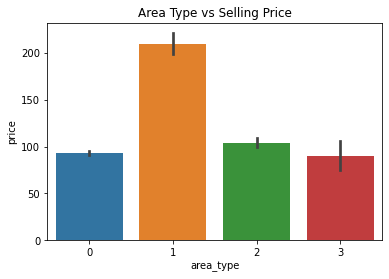

In [38]:
sns.barplot(dataset['area_type'],dataset['price'])
plt.title('Area Type vs Selling Price')
plt.show()


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


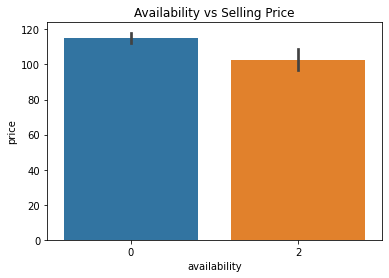

In [39]:
sns.barplot(dataset['availability'],dataset['price'])
plt.title('Availability vs Selling Price')
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


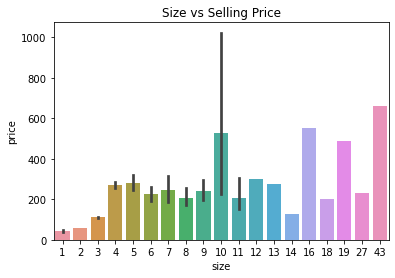

In [40]:
sns.barplot(dataset['size'],dataset['price'])
plt.title('Size vs Selling Price')
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


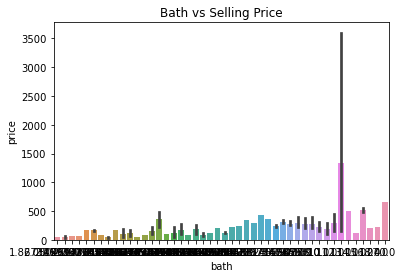

In [41]:
sns.barplot(dataset['bath'],dataset['price'])
plt.title('Bath vs Selling Price')
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


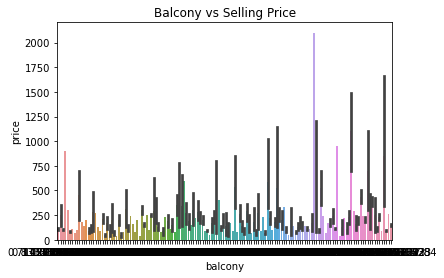

In [42]:
sns.barplot(dataset['balcony'],dataset['price'])
plt.title('Balcony vs Selling Price')
plt.show()

<AxesSubplot:>

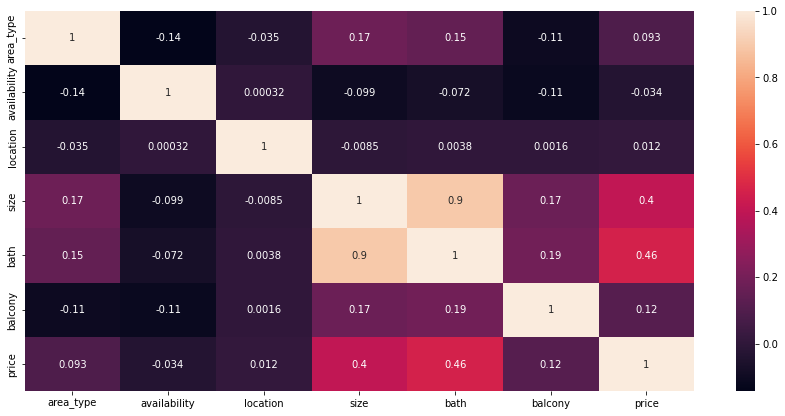

In [43]:
plt.figure(figsize=[15,7])
sns.heatmap(dataset.corr(), annot=True)

In [44]:
dataset.dtypes

area_type         int64
availability      int64
location          int32
size              int64
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [45]:
dataset['total_sqft'].isna().sum()

0

In [46]:
import re

In [47]:
def preprocess_total_sqft(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0

In [48]:
dataset['total_sqft'] = dataset.total_sqft.str.split('-').apply(preprocess_total_sqft)

In [49]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,2,419,2,Coomee,1056.0,2.0,1.0,39.07
1,1,0,317,4,Theanmp,2600.0,5.0,3.0,120.00
2,2,0,1179,3,NaN,1440.0,2.0,3.0,62.00
3,0,0,756,3,Soiewre,1521.0,3.0,1.0,95.00
4,0,0,715,2,NaN,1200.0,2.0,1.0,51.00


In [50]:
dataset.dtypes

area_type         int64
availability      int64
location          int32
size              int64
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [51]:
dataset=dataset.drop(['society'],axis=1)

In [52]:
X=dataset.drop(['price'],axis=1)
Y=dataset['price']

In [53]:
for col in X.columns:
    print(col)

area_type
availability
location
size
total_sqft
bath
balcony


In [54]:
print(X)

       area_type  availability  location  size  total_sqft  bath  balcony
0              0             2       419     2      1056.0   2.0      1.0
1              1             0       317     4      2600.0   5.0      3.0
2              2             0      1179     3      1440.0   2.0      3.0
3              0             0       756     3      1521.0   3.0      1.0
4              0             0       715     2      1200.0   2.0      1.0
...          ...           ...       ...   ...         ...   ...      ...
13315          2             0      1252     5      3453.0   4.0      0.0
13316          0             0      1004     4      3600.0   5.0      1.5
13317          2             0       972     2      1141.0   2.0      1.0
13318          0             2       907     4      4689.0   4.0      1.0
13319          0             0       396     1       550.0   1.0      1.0

[13304 rows x 7 columns]


In [55]:
print(Y)

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13304, dtype: float64


In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# Model Training

1. Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [58]:
lreg.fit(X_train,Y_train)

LinearRegression()

In [59]:
training_data_prediction=lreg.predict(X_train)

In [60]:
Accuracy=[]
Algorithm=[]
Algorithm.append('LinearRegression')
Accuracy.append(lreg.score(X_test,Y_test))
print(lreg.score(X_test,Y_test))
for i in Algorithm, Accuracy:
    print(i,end=',')

0.18554127435167567
['LinearRegression'],[0.18554127435167567],

2. Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
predicted_tree = dtr.predict(X_test)
Algorithm.append('DecisionTreeRegresor')
Accuracy.append(dtr.score(X_test,Y_test))
print(dtr.score(X_test,Y_test))

0.368642768495564


3. Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
rfr = RandomForestRegressor(n_estimators = 65, random_state=6)
rfr.fit(X_train, Y_train)
predicted_forest = rfr.predict(X_test)
Accuracy.append(rfr.score(X_test,Y_test))
print(rfr.score(X_test,Y_test))

0.6637885146484845


4. SVM

In [63]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegression')
svr = SVR()
svr.fit(X_train, Y_train)
predicted_svr = svr.predict(X_test)
Accuracy.append(svr.score(X_test,Y_test))
print(svr.score(X_test,Y_test))

0.1257858342433773


In [64]:
import pickle
model = rfr
pickle.dump(model,open("HousePricePrediction.pkl",'wb'))